In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import re

import statsmodels.api as sm  # smoothing
from scipy.signal import find_peaks


In [2]:
def add_axes(ax, minor=True, minor_locator=2):
    axx = ax.secondary_xaxis('top')
    axx.tick_params(
        which='both',
        direction='in',
        labeltop=False,)

    axy = ax.secondary_yaxis('right')
    axy.tick_params(
        which='both',
        direction='in',
        labelright=False,)
    if minor == True:

        ax.yaxis.set_minor_locator(
            matplotlib.ticker.AutoMinorLocator(minor_locator))
        ax.xaxis.set_minor_locator(
            matplotlib.ticker.AutoMinorLocator(minor_locator))
        axx.xaxis.set_minor_locator(
            matplotlib.ticker.AutoMinorLocator(minor_locator))
        axy.yaxis.set_minor_locator(
            matplotlib.ticker.AutoMinorLocator(minor_locator))


def read_file(fname): # read line after regex in file 
    # print('Reading file', fname)
    with open(fname) as f:
        data = []
        regex = r"^ Energy$"
        lines = f.readlines()
        for i, line in enumerate(lines):
            if re.match(regex, line):
                data.append(float(lines[i+1]))
        return np.asarray(data) 


def plot_Delta_in_dir(Samp):
    plt.style.use('article-1x1.mplstyle')
    plt.rcParams.update(
        {'font.size': 26, 'lines.markersize': 22, 'lines.linewidth': 0, 'lines.marker': '.', })

    fig, ax = plt.subplots(figsize=(20, 12))

    num = np.arange(len(Samp.dftEnergy)) + 1
    ax.plot(num, Samp.deltaEnergy)

    # ax.set_xlim(-10, 110)
    # ax.set_ylim(0, None)
    ax.set_ylabel(r'$\Delta$(DFT-MLIP) energy, eV')
    ax.set_xlabel(r'Number of isomer')
    add_axes(ax, minor_locator=2)
    # ax.legend(framealpha=0)

    path = os.path.join(Samp.dir,'%s-DeltaEnergy.png' % Samp.dir)
    # plt.savefig(path, facecolor='white', bbox_inches='tight')


def plot_Energies_in_dir(Samp):
    plt.style.use('article-1x1.mplstyle')
    plt.rcParams.update(
        {'font.size': 26, 'lines.markersize': 22, 'lines.linewidth': 0, 'lines.marker': '.', })

    fig, ax = plt.subplots(figsize=(20, 12))

    ax.plot(Samp.mlipEnergy, Samp.dftEnergy)
    

    # ax.set_xlim(-10, 110)
    # ax.set_ylim(0, None)
    ax.set_ylabel(r'DFT energy, eV')
    ax.set_xlabel(r'MLIP energy, eV')
    add_axes(ax, minor_locator=2)
    # ax.legend(framealpha=0)

    path = os.path.join(Samp.dir, '%s-mlipE-dftE-vs.png' % Samp.dir)
    # plt.savefig(path, facecolor='white', bbox_inches='tight')


In [3]:
class Sample:
    # Constructor
    def __init__(self, plotDir,\
            dft_fname='DFT.energy', mlip_fname='MLIP.energy',\
            fSaveDFT='DFT.energy-0', fSaveMLIP='MLIP.energy-0',\
            fSaveDelta='Delta.energy-0'):
        self.dir = plotDir
        print('plotDir =', self.dir)
        self.dft_fpath = os.path.join(plotDir,dft_fname)
        self.mlip_fpath = os.path.join(plotDir, mlip_fname)
        # print('dft file path =', self.dft_fpath)
        # print('mlip file path =', self.mlip_fpath)
        self.dftEnergy = read_file(self.dft_fpath)
        self.mlipEnergy = read_file(self.mlip_fpath)
        
        self.fSaveDFT = os.path.join(plotDir,fSaveDFT)
        self.fSaveMLIP = os.path.join(plotDir,fSaveMLIP)
        self.fSaveDelta = os.path.join(plotDir,fSaveDelta)
        
        print()
    
    def calc_delta(self):
        self.deltaEnergy = self.dftEnergy - self.mlipEnergy
        
        
    def save2file(self):
        with open(self.fSaveDFT, 'w') as f:
            for e in self.dftEnergy:
                f.write(str(e)+'\n')
                
        with open(self.fSaveMLIP, 'w') as f:
            for e in self.mlipEnergy:
                f.write(str(e)+'\n')
                        
        with open(self.fSaveDelta, 'w') as f:
            for e in self.deltaEnergy:
                f.write(str(e)+'\n')
            
    # def cut_xy(self, From, To):
    #     # print(From, To)
    #     ind_cut = np.where((self.x > From) & (self.x < To))
    #     self.x, self.y = self.x[ind_cut], self.y[ind_cut]
    #     self.cutFlag = '-cut'

    # def find_max_cut(self, From=None, To=None, distance=20,
    #                  prominence=None, threshold=None, height=None, x=None, y=None):
    #     x = self.x if x is None else x
    #     y = self.y if y is None else y

    #     if From is None:
    #         From = np.nanmin(x)
    #     if To is None:
    #         To = np.nanmax(x)
    #     # print('From =', From, 'To =', To)
    #     ind_cut = np.where((x > From) & (x < To))
    #     x, y = x[ind_cut], y[ind_cut]

    #     peak, _ = find_peaks(y*1, distance=distance, prominence=prominence,
    #                          threshold=threshold, height=height)
    #     Xmax, Ymax = x[peak], y[peak]
    #     return Xmax, Ymax

    # def find_min_cut(self, From=None, To=None, distance=None, prominence=None, threshold=None, height=None):
    #     x, y = self.x, self.y
    #     if From is None:
    #         From = np.nanmin(x)
    #     if To is None:
    #         To = np.nanmax(x)
    #     # print('From =', From, 'To =', To)
    #     ind_cut = np.where((x > From) & (x < To))
    #     x, y = x[ind_cut], y[ind_cut]

    #     peak, _ = find_peaks(y*-1, distance=distance, prominence=prominence,
    #                          threshold=threshold, height=height)
    #     Xmin, Ymin = x[peak], y[peak]
    #     # print(Xmin, Ymin)
    #     return Xmin, Ymin

    # def smooth(self, frac=0.05):
    #     lowess = sm.nonparametric.lowess(self.x, self.y, frac=frac)
    #     self.x, self.y = lowess[:, 0], lowess[:, 1]
    #     self.smoothFlag = '-smooth'

    # def normalize(self):
    #     y_max = np.nanmax(self.y, axis=0)
    #     self.y = self.y / y_max
    #     self.normFlag = '-norm'


In [4]:
root = os.getcwd()
print("Working directory:", root)
Dirs = [x for x in os.listdir() if os.path.isdir(x)]
print("Directories inside:\n", Dirs)


Working directory: /home/mik/Projects/Plotting-projects-git/plotEnergy/validation
Directories inside:
 ['3_17', '2_15', '3_22', '1_24', '2_28', '1_28', '1_19', '5_20', '1_15', '5_15']


plotDir = 3_17

plotDir = 2_15

plotDir = 3_22

plotDir = 1_24

plotDir = 2_28

plotDir = 1_28

plotDir = 1_19

plotDir = 5_20

plotDir = 1_15

plotDir = 5_15



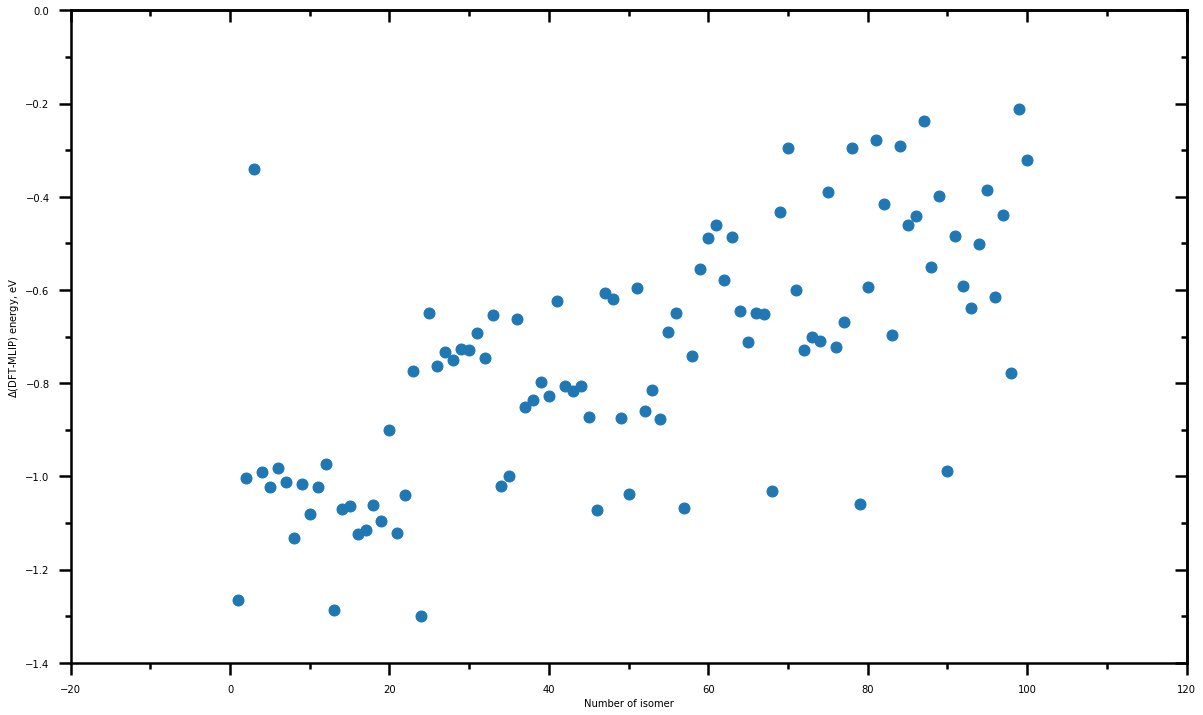

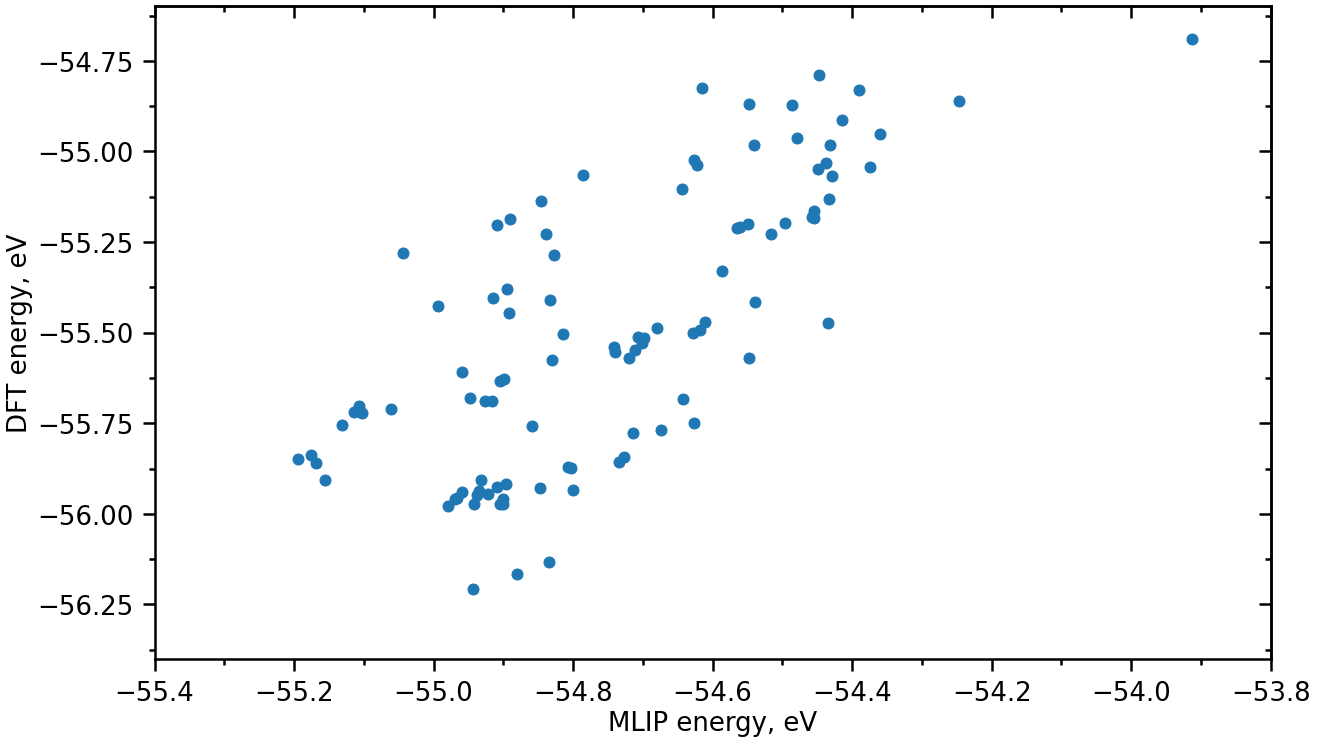

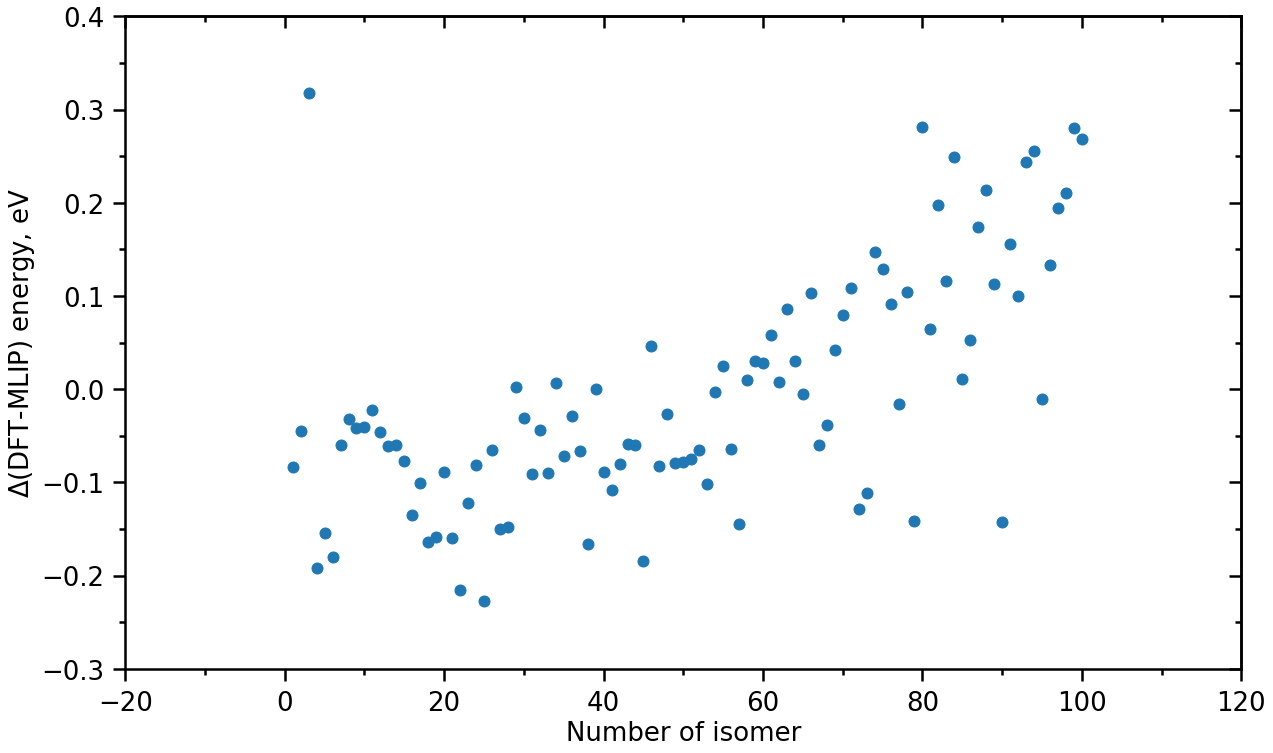

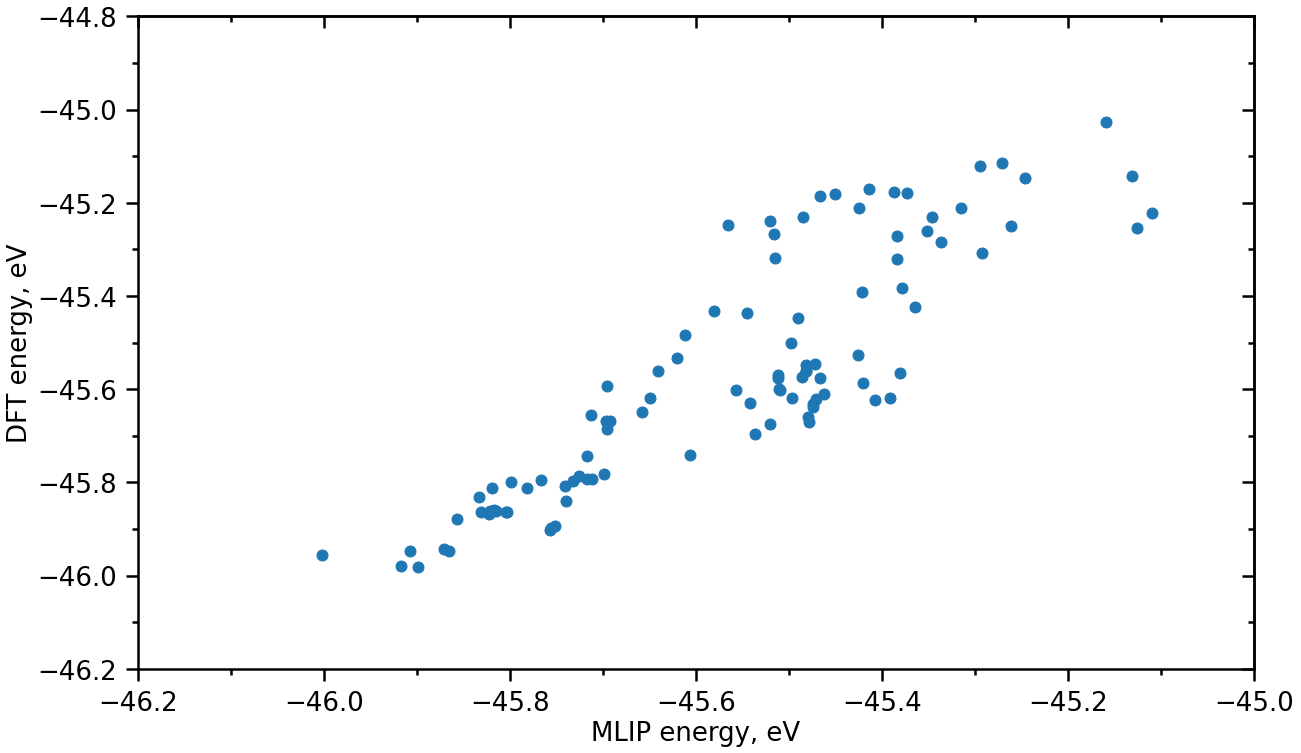

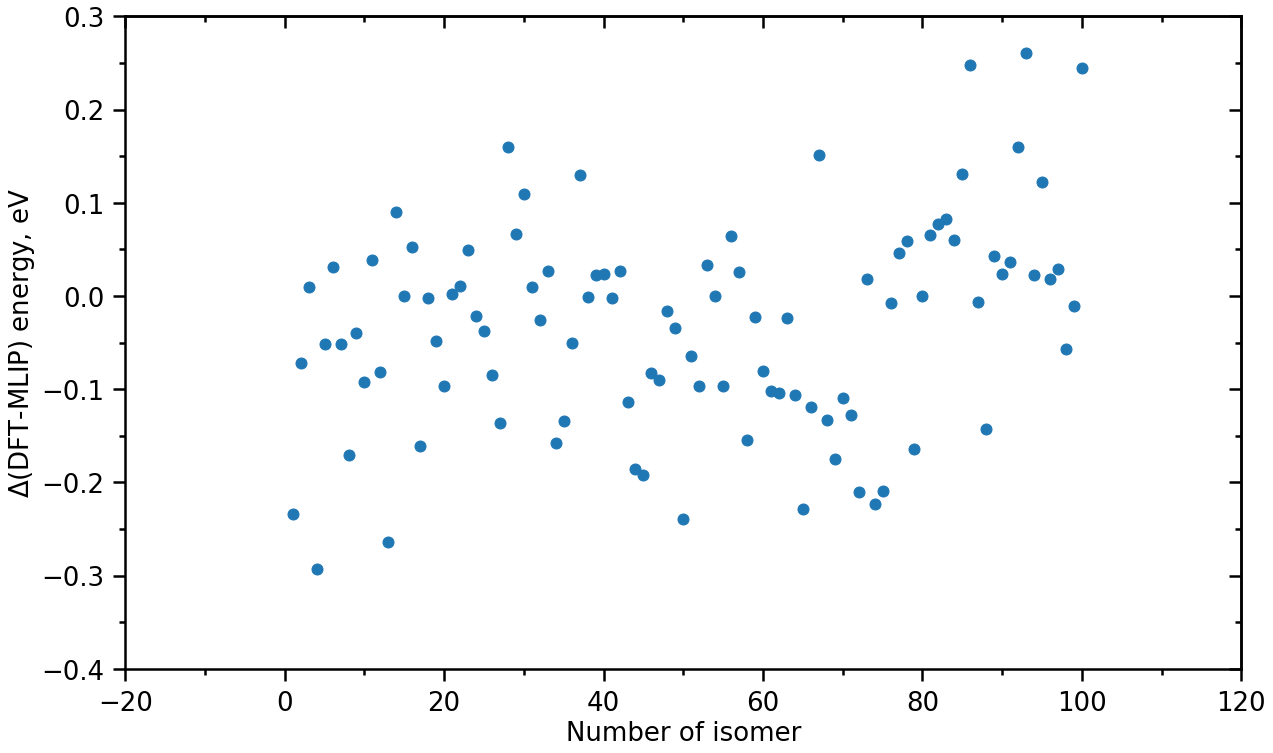

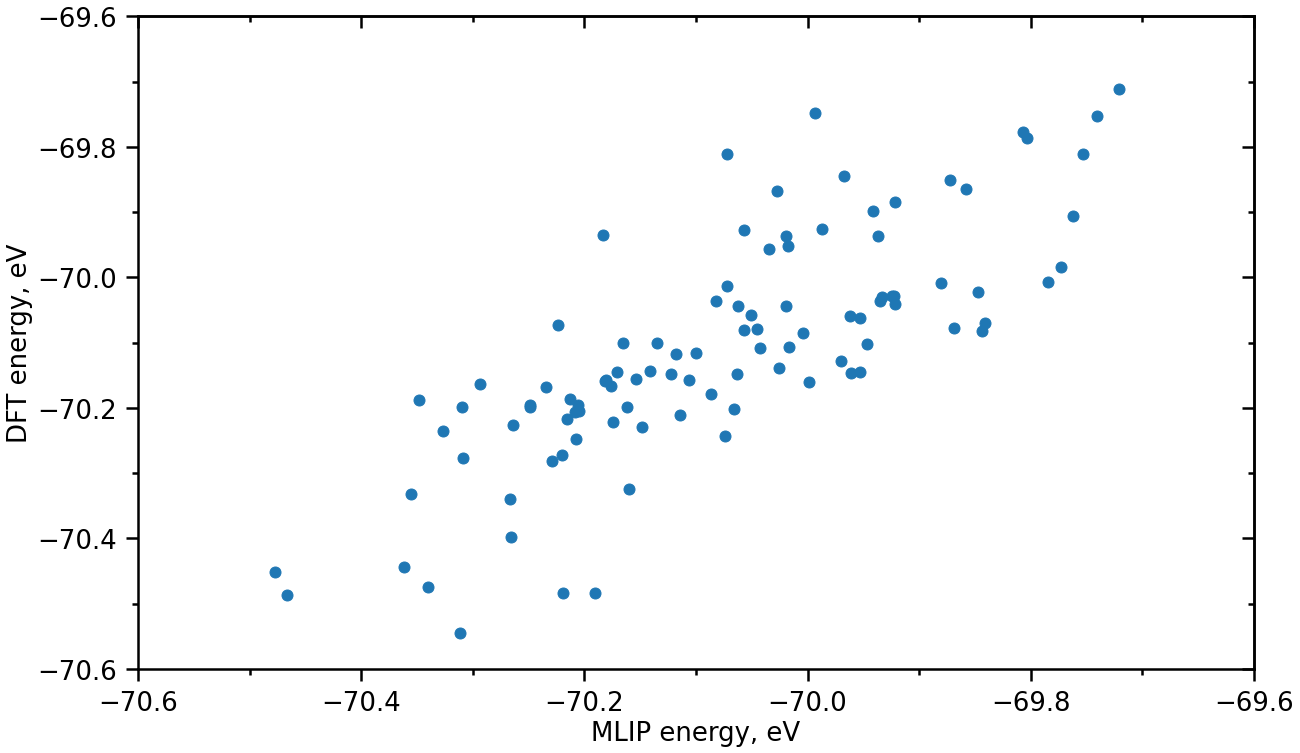

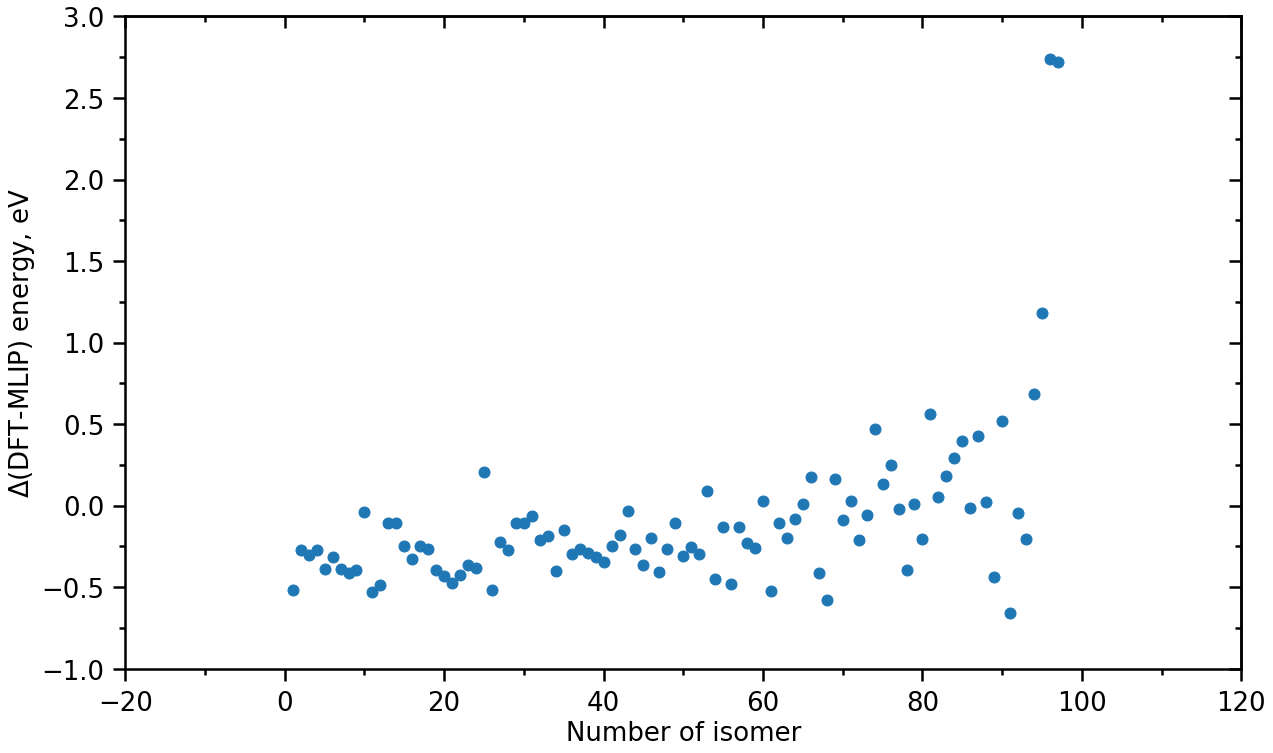

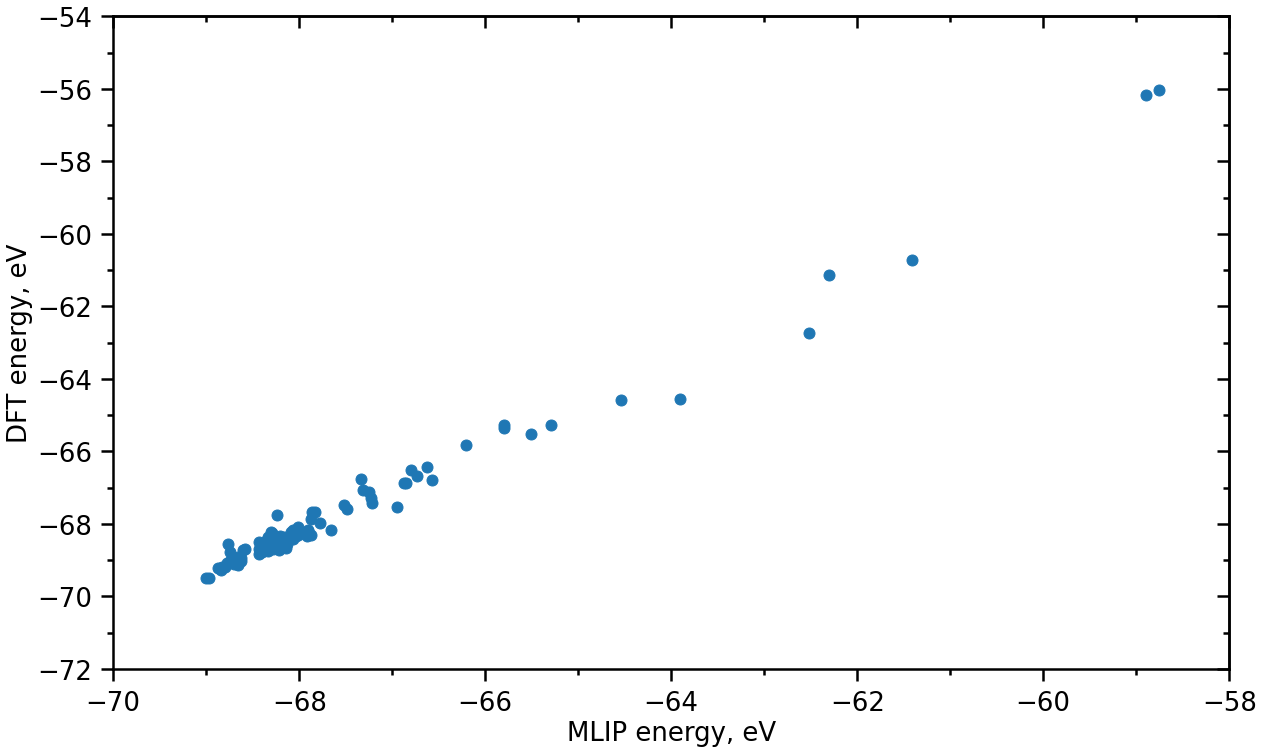

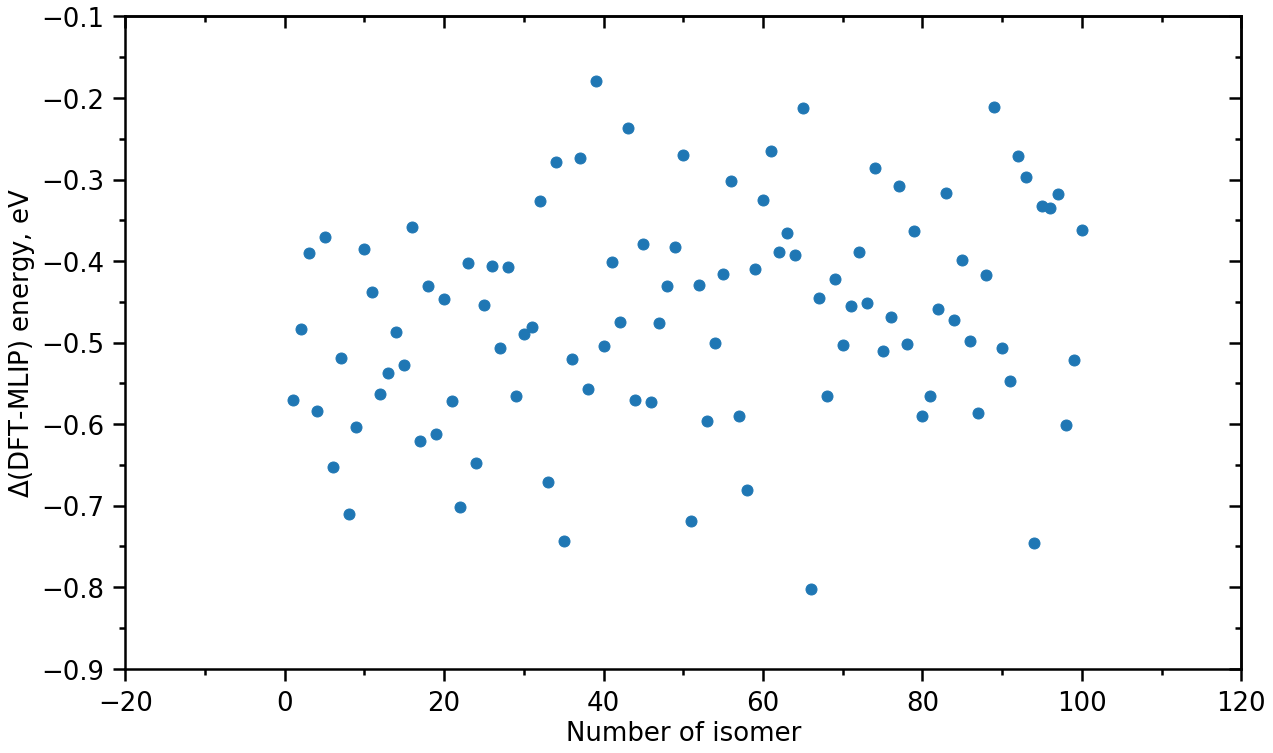

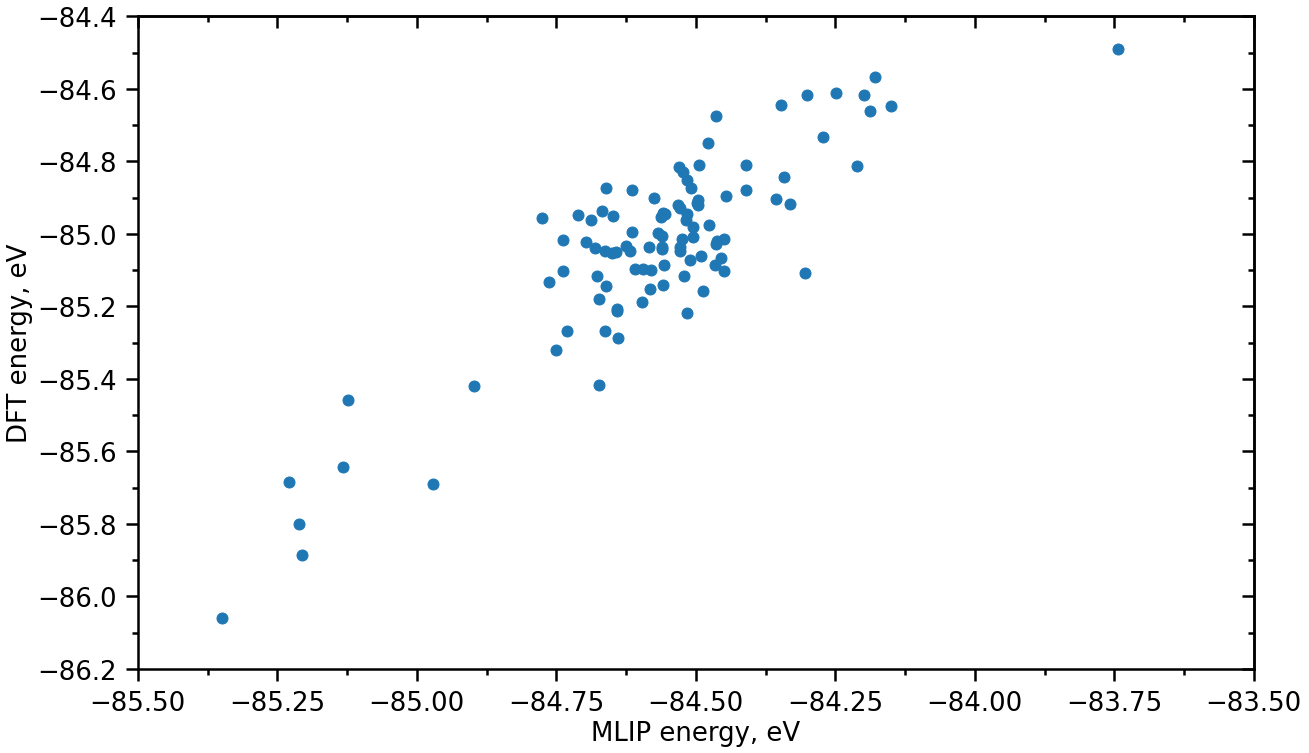

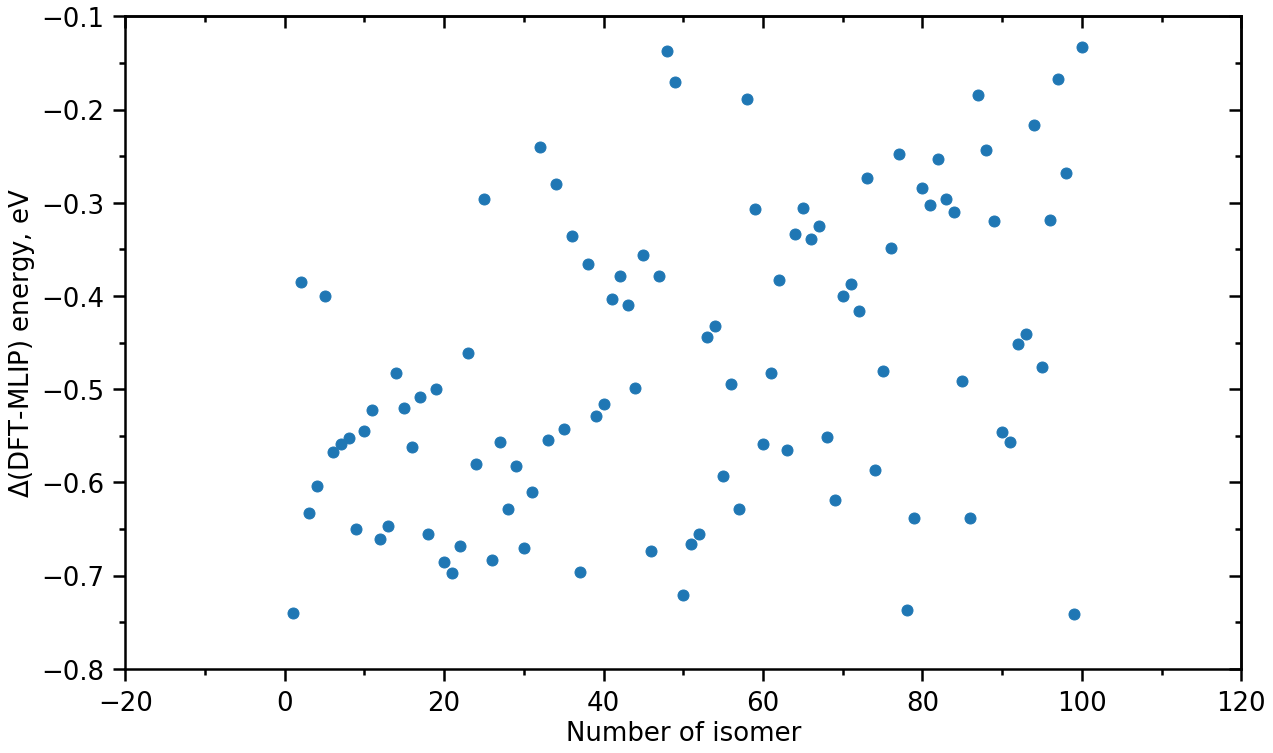

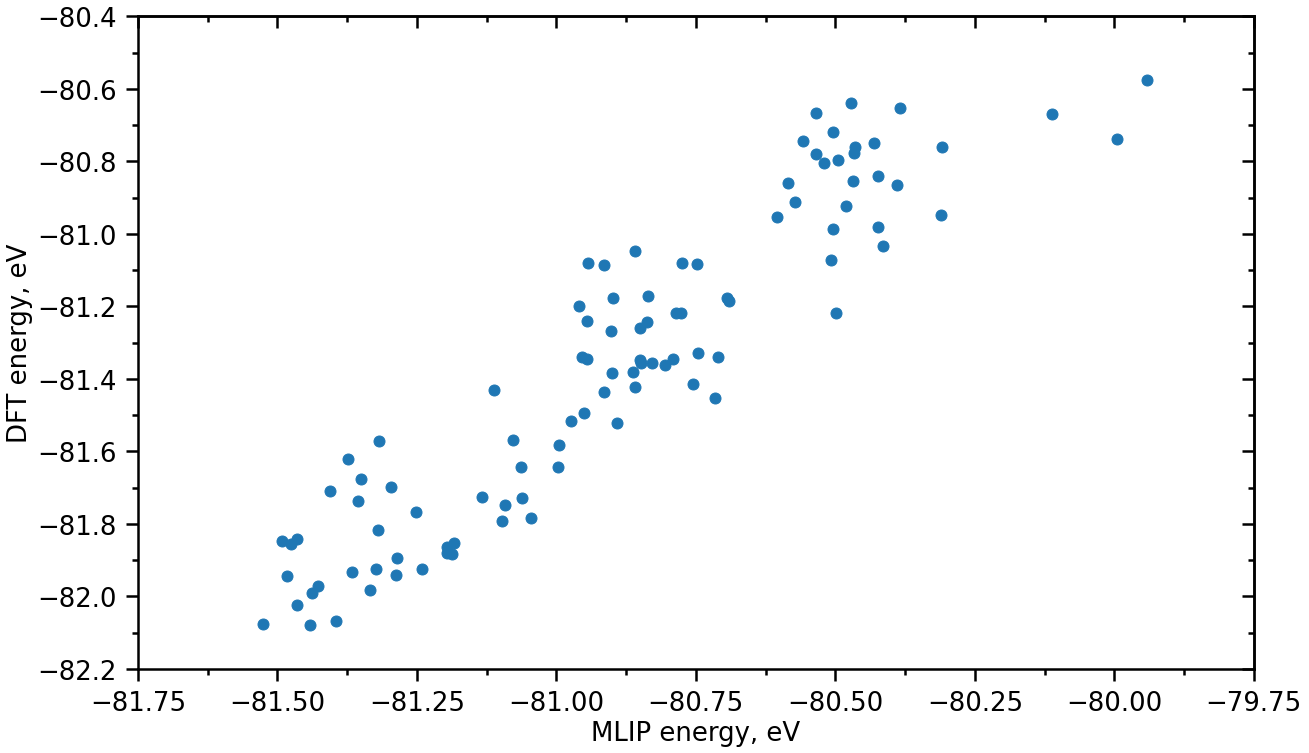

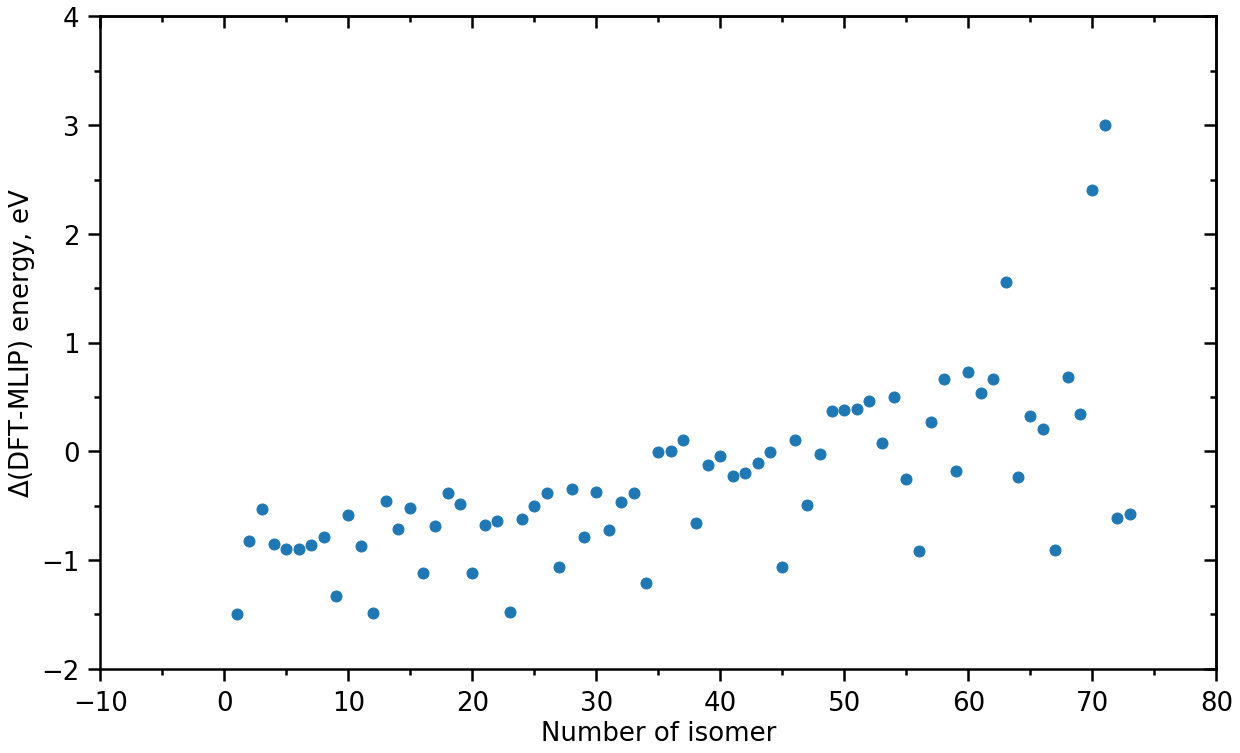

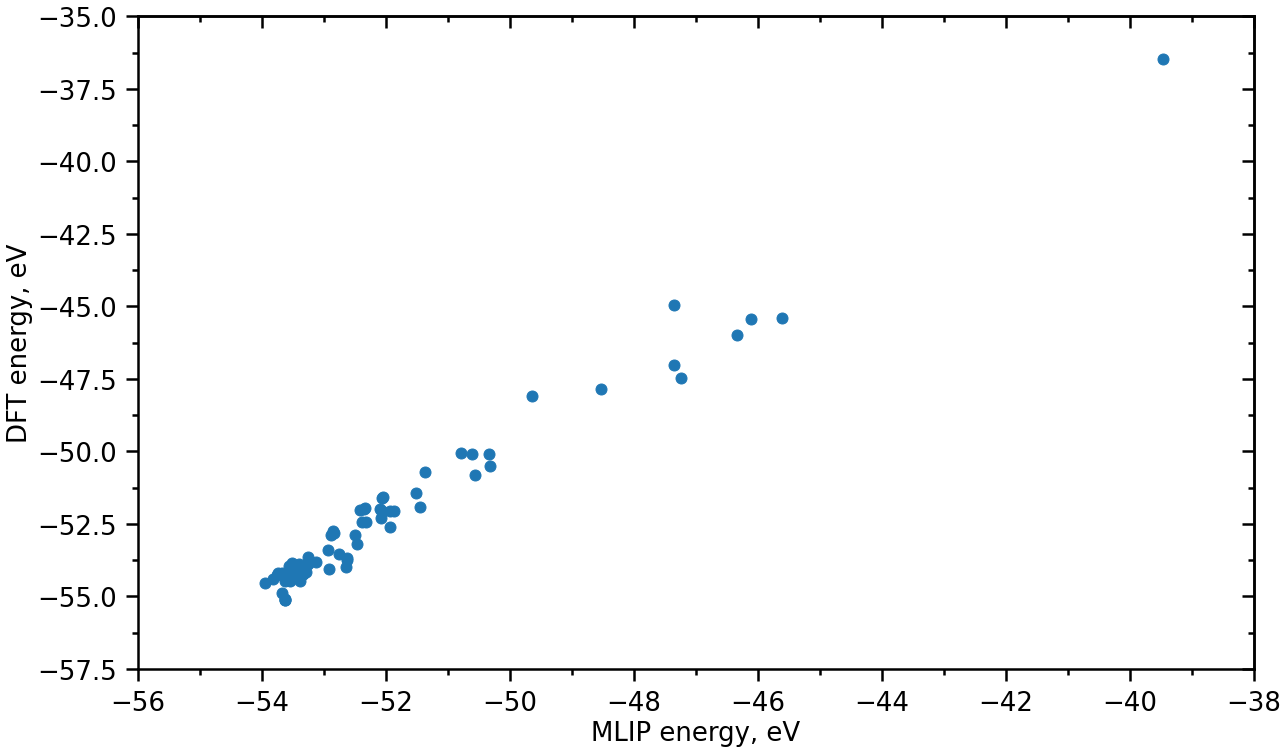

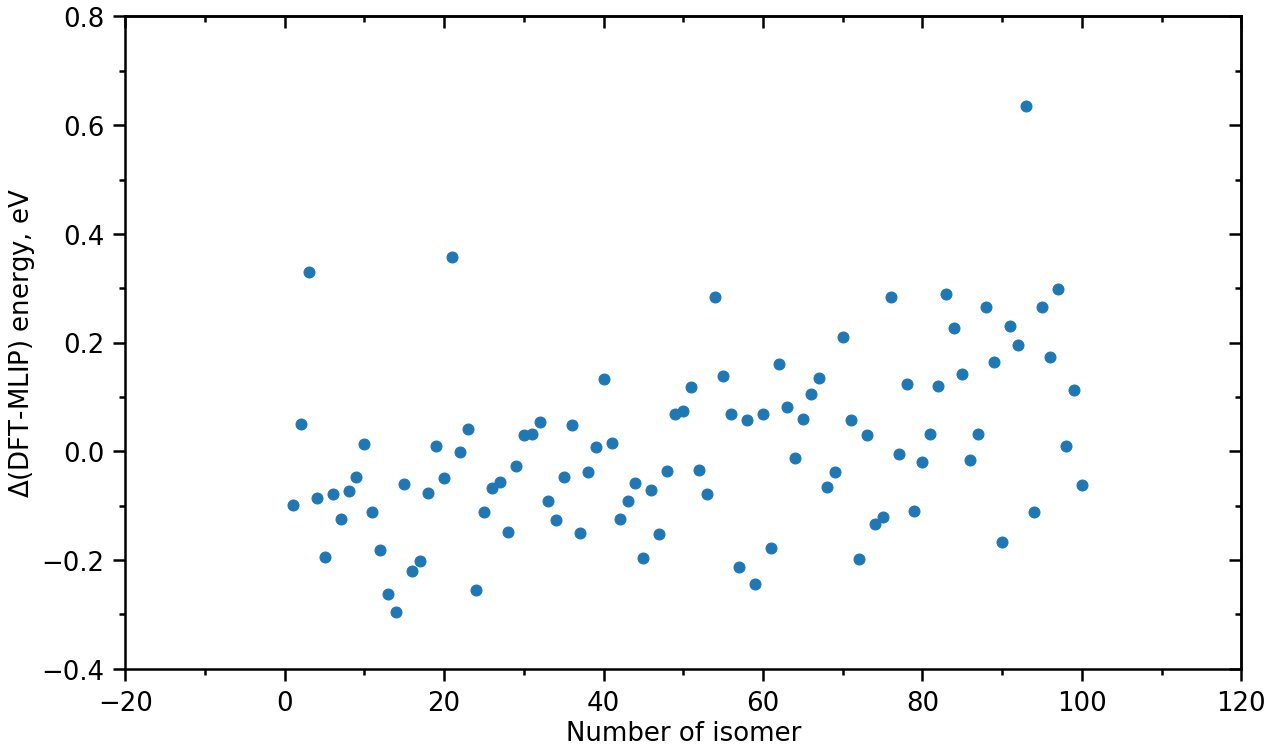

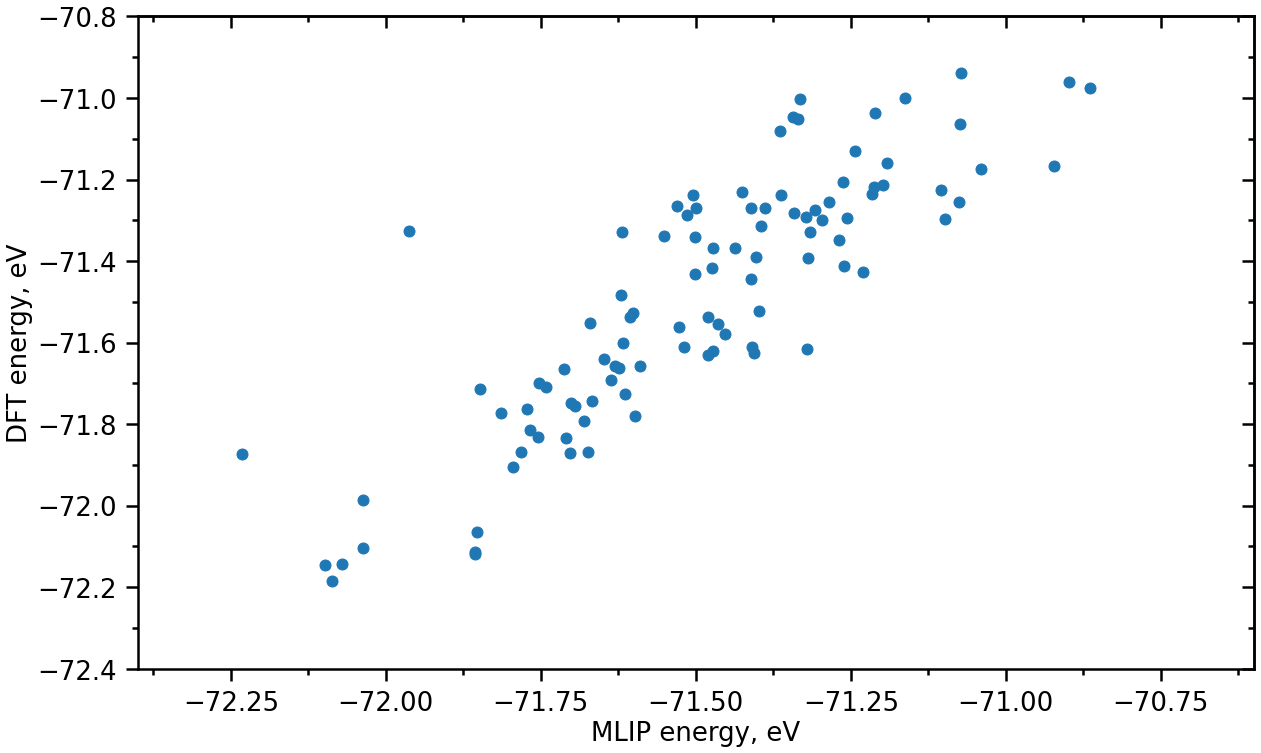

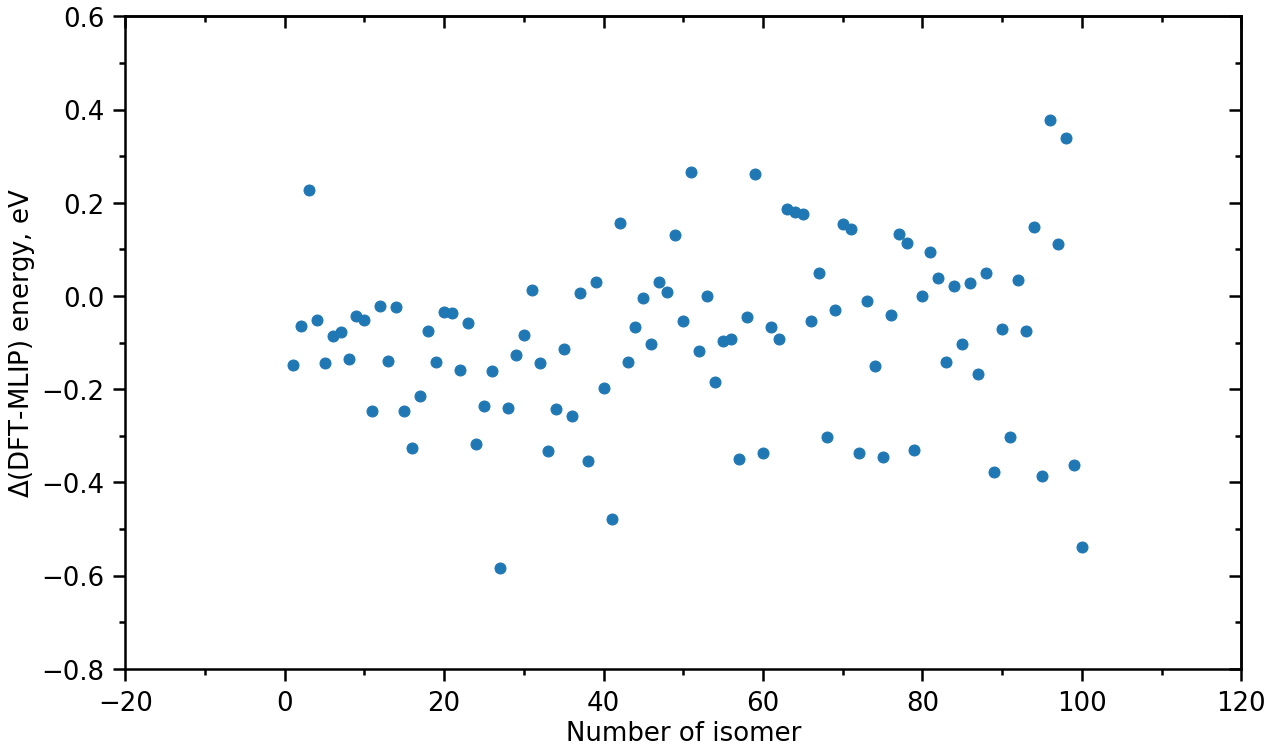

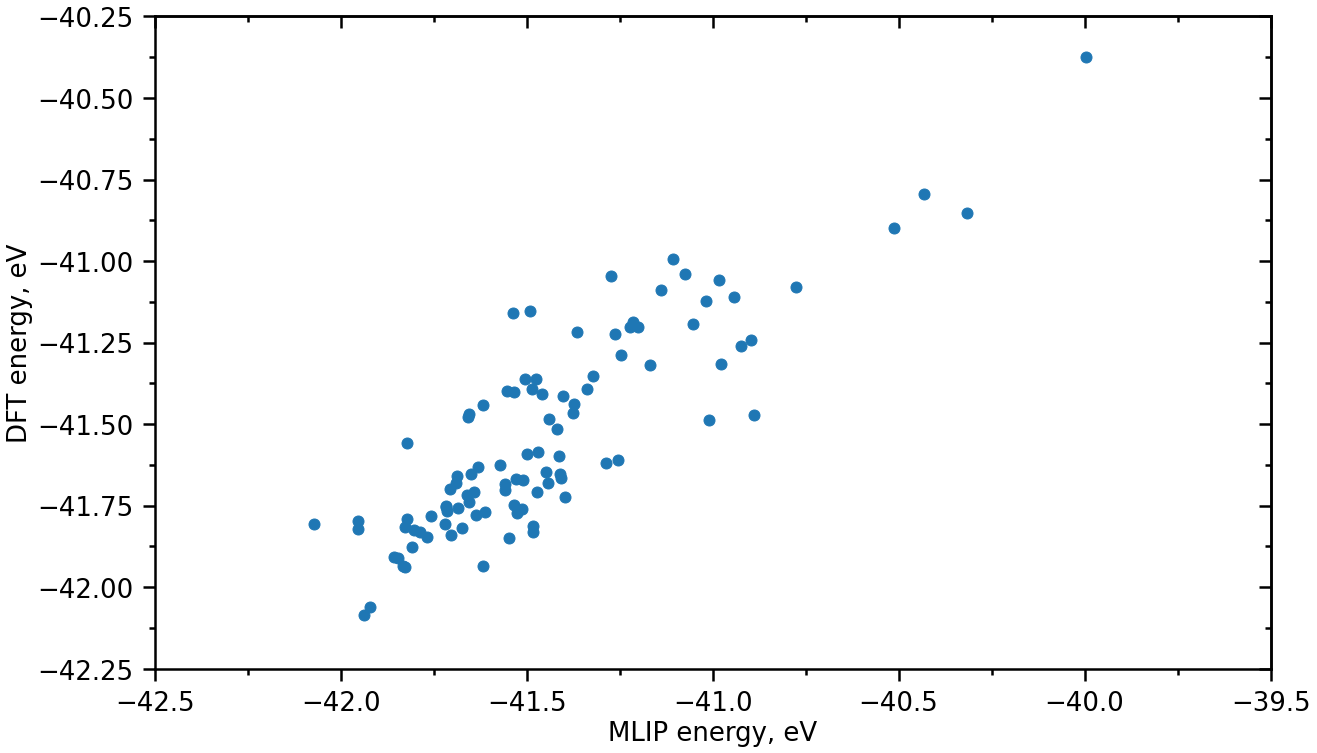

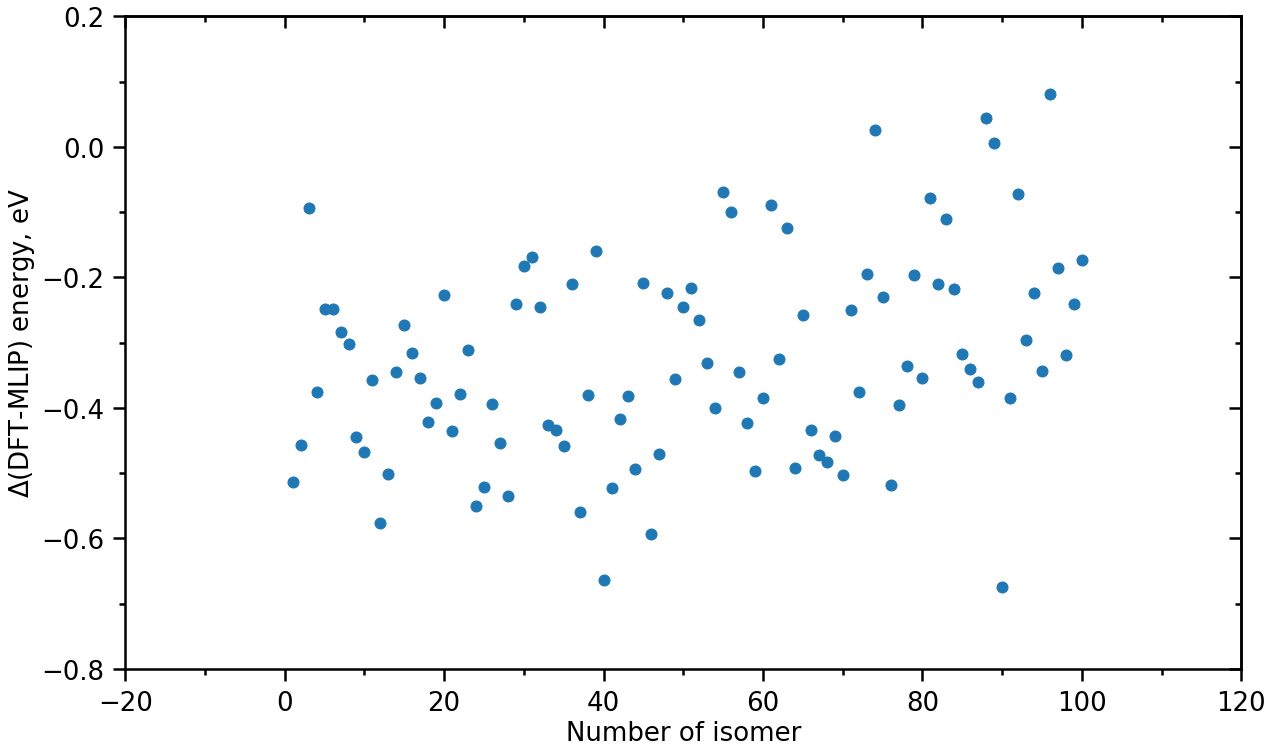

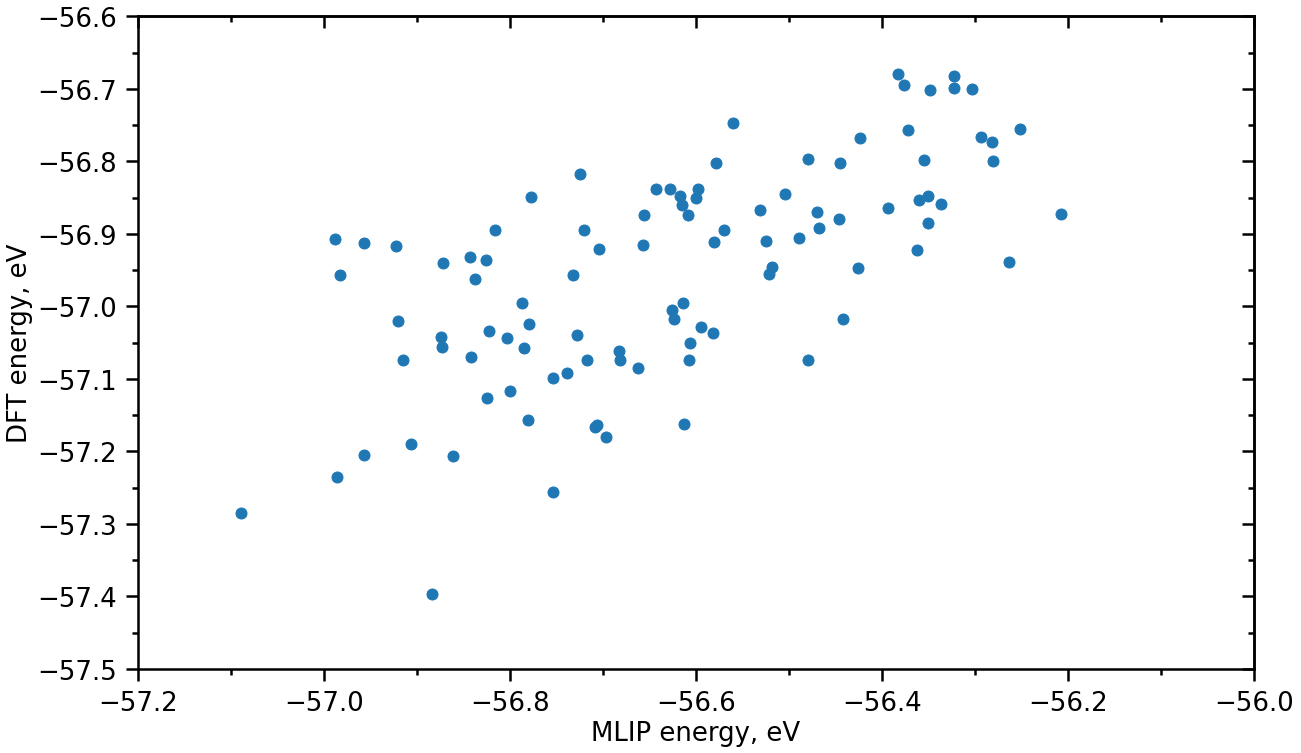

In [5]:
for pltDir in Dirs:
    Samp = Sample(pltDir)
    Samp.calc_delta()
    Samp.save2file()
    plot_Delta_in_dir(Samp)
    plot_Energies_in_dir(Samp)
